<a href="https://colab.research.google.com/github/Dinesh-Adhithya-H/Machine-learning-in-Football/blob/main/Team_performance_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!wget https://raw.githubusercontent.com/eddwebster/football_analytics/master/data/stats-perform/CPL%20Team%20by%20Game%202019.csv

--2021-04-04 10:00:21--  https://raw.githubusercontent.com/eddwebster/football_analytics/master/data/stats-perform/CPL%20Team%20by%20Game%202019.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 108553 (106K) [text/plain]
Saving to: ‘CPL Team by Game 2019.csv’

CPL Team by Game 20 100%[===================>] 106.01K  --.-KB/s    in 0.02s   

2021-04-04 10:00:21 (4.33 MB/s) - ‘CPL Team by Game 2019.csv’ saved [108553/108553]



In [ ]:
data = pd.read_csv('/content/CPL Team by Game 2019.csv')

In [ ]:
np.array(data.columns)

array(['Rank', 'GM', 'optaTeamId', 'team', 'leagueId', 'league', 'week',
       'SubOff', 'SubOn', 'GWG', 'SOG', 'SOTInBox', 'SOTOBox',
       'BlkdInBox', 'BlkdOutBox', 'Off', 'OffTgtOBox', 'OffTgtInBox',
       'PenTaken', 'PenGoal', 'ShotDirFK', 'GoalDirFK', 'GoalInBx',
       'GoalOBx', 'GoalOP', 'GoalHead', 'OfTgHd', 'SOTHead', 'GoalLF',
       'GoalRF', 'ShotLF', 'ShotRF', 'PsOpHfFl', 'PsOnHfFl', 'PsAtt',
       'PsOnHfScs', 'PsOpHfScs', 'ExpG', 'Goal', 'Ast', 'ExpA', 'BgChnc',
       'BgChncCrtd', 'ChncSetPl', 'ChncOpnPl', 'Chance', '1v1',
       '1v1InBox', 'Sc1v1InBox', 'SucflDuels', 'Success1v1', 'ThrghBalls',
       'ThrghBlCmp', 'Touches', 'DuelLs', 'FailTackle', 'SucflTkls',
       'Int', 'DefTouch', 'TcklMade%', 'Clrnce', 'HeadClear', 'Recovery',
       'FlComA3', 'FlComD3', 'FlComM3', 'FlSufA3', 'FlSufD3', 'FlSufM3',
       'Offsides', 'CleanSheet', 'CrossPunch', 'ErrGoal', 'ErrShot',
       'Cleared', 'KeeperCtch', 'GoalCncd', 'GoalCnIBx', 'GoalCnOBx',
       'PensWon',

In [ ]:
data

,Rank,GM,optaTeamId,team,leagueId,league,week,SubOff,SubOn,GWG,SOG,SOTInBox,SOTOBox,BlkdInBox,BlkdOutBox,Off,OffTgtOBox,OffTgtInBox,PenTaken,PenGoal,ShotDirFK,GoalDirFK,GoalInBx,GoalOBx,GoalOP,GoalHead,OfTgHd,SOTHead,GoalLF,GoalRF,ShotLF,ShotRF,PsOpHfFl,PsOnHfFl,PsAtt,PsOnHfScs,PsOpHfScs,ExpG,Goal,Ast,...,TchsD3,TchsM3,TouchOpBox,%PassFwd,Pass%,PsCmpM3,PsCmpA3,PsCmpD3,PsAttA3,PsAttD3,PsAttM3,Pull Back Passes Completed,PsDist,ChlngeLost,Aerial%,Aerials,ExpGAg,Average Shot Distance Open Play,PullBk,BgChnc.1,BgChncGoal,CrossOpen,Crosses,FwdPassCmp%,DefTouchD3,DefTouchM3,DefTouchA3,Open Play xG,Set Piece XG,NonPenxG,Key Passes,Defensive Blocks,xG Per Shot,Shots Total,game,date,gameId,oppOptaTeamId,scatterId,scatterExtra
0,1,1,15377,Forge,6lkj3o21cr4g7bql6tb3fk222,Canadian Premier League (Canada),NaN,3,3,0,5,3,2,2,1,4,1,2,0,0,2,0,1,0,1,0,0,0,0,1,2,7,72,10,691,285,324,1.29,1,1,...,152,464,20,25.9%,88.1%,378,120,111,152,124,415,0,18.1,4,36.8%,19,0.04,14,0,1,1,9,12,74.9%,10,10,5,0.98,0.30,1.29,7,0,0.11,12,FOR vs EDM,2019-07-06,4ypbcugzi0b9jaqs2xkhvvv56,6925,c2pdzdl3dgf5b0siidn2ay5ii:1052410,FOR vs EDM (2019-07-06)
1,2,1,15382,York United,6lkj3o21cr4g7bql6tb3fk222,Canadian Premier League (Canada),NaN,3,3,0,5,4,1,0,1,5,2,1,0,0,1,0,0,0,0,0,2,1,0,0,5,2,74,39,583,293,177,0.65,0,0,...,280,352,24,36.9%,80.6%,239,54,177,71,214,298,0,17.7,13,36.0%,25,0.96,17,0,0,0,21,31,67.0%,27,13,4,0.36,0.29,0.65,8,3,0.06,11,YRK vs HFX,2019-06-22,4v7kvm443j8j9oc0k0kr5fa7e,15376,cqthcpums3aas2tdy0qhlkuwa:1052401,YRK vs HFX (2019-06-22)
2,3,1,15382,York United,6lkj3o21cr4g7bql6tb3fk222,Canadian Premier League (Canada),NaN,3,3,0,6,2,4,0,3,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,5,79,16,562,284,183,0.41,0,0,...,257,358,12,29.5%,83.1%,244,62,161,87,188,287,0,19.1,7,42.3%,26,1.45,23,0,0,0,17,27,64.5%,29,17,6,0.31,0.10,0.41,7,4,0.04,10,HFX vs YRK,2019-07-06,4yz3ra9ne1a5j97bpncakl6y2,15376,cqthcpums3aas2tdy0qhlkuwa:1052411,HFX vs YRK (2019-07-06)
3,4,1,15377,Forge,6lkj3o21cr4g7bql6tb3fk222,Canadian Premier League (Canada),NaN,3,3,0,6,4,2,2,0,12,3,8,0,0,0,0,1,0,1,0,0,0,0,1,5,13,61,34,547,224,228,1.90,1,1,...,206,359,37,33.1%,82.6%,237,94,121,122,141,284,0,16.7,8,55.0%,20,0.41,16,0,2,0,15,19,73.5%,39,12,6,1.75,0.15,1.90,15,2,0.10,20,FOR vs YRK,2019-04-27,4ilfbdmlp4zuj7k3cene3m5wq,15382,c2pdzdl3dgf5b0siidn2ay5ii:1052375,FOR vs YRK (2019-04-27)
4,5,1,15382,York United,6lkj3o21cr4g7bql6tb3fk222,Canadian Premier League (Canada),NaN,3,3,0,7,3,4,1,3,8,4,3,0,0,1,0,0,0,0,0,2,0,0,0,6,7,75,9,584,296,204,1.23,0,0,...,167,442,29,27.7%,85.6%,321,60,119,83,134,367,0,18.9,6,50.0%,30,1.25,21,0,2,0,19,24,70.4%,13,12,5,1.14,0.09,1.23,14,1,0.06,19,YRK vs PAC,2019-08-17,57b8spz8wxhzbj03rcqu6cktm,15380,cqthcpums3aas2tdy0qhlkuwa:1052434,YRK vs PAC (2019-08-17)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,1,15380,Pacific,6lkj3o21cr4g7bql6tb3fk222,Canadian Premier League (Canada),NaN,3,3,0,2,1,1,1,2,3,2,0,1,1,1,0,1,0,0,0,1,0,1,0,2,2,76,26,291,110,79,1.43,1,0,...,168,199,9,49.1%,64.9%,101,20,68,29,106,156,0,20.2,5,36.1%,36,3.70,19,0,2,1,7,12,44.8%,22,11,1,0.15,1.28,0.64,4,2,0.18,8,CAV vs PAC,2019-09-22,5frccedgczakga77kz816gq5m,15381,b3436h8h14zw7f1uv6w9vqf6y:1052456,CAV vs PAC (2019-09-22)
196,197,1,15376,HFX Wanderers,6lkj3o21cr4g7bql6tb3fk222,Canadian Premier League (Canada),NaN,3,3,0,0,0,0,1,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,64,28,252,89,71,0.17,0,0,...,208,156,4,53.2%,63.5%,62,25,73,36,116,100,0,20.4,11,35.3%,17,0.96,28,0,0,0,7,12,45.5%,47,11,1,0.12,0.05,0.17,5,2,0.03,5,CAV vs HFX,2019-10-05,5l2yv4eiv12t5oztzmppfxsoa,15381,5gmx3o5y2oc0i6rowjwtu7jvu:1052464,CAV vs HFX (2019-10-05)
197,198,1,15378,Valour,6lkj3o21cr4g7bql6tb3fk222,Canadian Premier League (Canada),NaN,3,3,0,1,1,0,0,2,3,3,0,0,0,0,0,1,0,1,0,0,0,1,

In [ ]:
data_trim = data

In [ ]:
data_trim.drop(["leagueId","week",'league','Rank','GM','optaTeamId','game','date','gameId','oppOptaTeamId',"scatterId"], inplace=True, axis = 1)

In [ ]:
data_trim

,team,SubOff,SubOn,GWG,SOG,SOTInBox,SOTOBox,BlkdInBox,BlkdOutBox,Off,OffTgtOBox,OffTgtInBox,PenTaken,PenGoal,ShotDirFK,GoalDirFK,GoalInBx,GoalOBx,GoalOP,GoalHead,OfTgHd,SOTHead,GoalLF,GoalRF,ShotLF,ShotRF,PsOpHfFl,PsOnHfFl,PsAtt,PsOnHfScs,PsOpHfScs,ExpG,Goal,Ast,ExpA,BgChnc,BgChncCrtd,ChncSetPl,ChncOpnPl,Chance,...,Red,Yellow,BgChncFace,Turnover,Disposs,TchsA3,TchsD3,TchsM3,TouchOpBox,%PassFwd,Pass%,PsCmpM3,PsCmpA3,PsCmpD3,PsAttA3,PsAttD3,PsAttM3,Pull Back Passes Completed,PsDist,ChlngeLost,Aerial%,Aerials,ExpGAg,Average Shot Distance Open Play,PullBk,BgChnc.1,BgChncGoal,CrossOpen,Crosses,FwdPassCmp%,DefTouchD3,DefTouchM3,DefTouchA3,Open Play xG,Set Piece XG,NonPenxG,Key Passes,Defensive Blocks,xG Per Shot,Shots Total
0,Forge,3,3,0,5,3,2,2,1,4,1,2,0,0,2,0,1,0,1,0,0,0,0,1,2,7,72,10,691,285,324,1.29,1,1,1.09,1,1,1,7,8,...,0,1,0,4,6,237,152,464,20,25.9%,88.1%,378,120,111,152,124,415,0,18.1,4,36.8%,19,0.04,14,0,1,1,9,12,74.9%,10,10,5,0.98,0.30,1.29,7,0,0.11,12
1,York United,3,3,0,5,4,1,0,1,5,2,1,0,0,1,0,0,0,0,0,2,1,0,0,5,2,74,39,583,293,177,0.65,0,0,0.53,0,0,2,6,8,...,0,1,1,4,5,175,280,352,24,36.9%,80.6%,239,54,177,71,214,298,0,17.7,13,36.0%,25,0.96,17,0,0,0,21,31,67.0%,27,13,4,0.36,0.29,0.65,8,3,0.06,11
2,York United,3,3,0,6,2,4,0,3,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,5,79,16,562,284,183,0.41,0,0,0.28,0,0,0,7,7,...,0,1,3,6,12,184,257,358,12,29.5%,83.1%,244,62,161,87,188,287,0,19.1,7,42.3%,26,1.45,23,0,0,0,17,27,64.5%,29,17,6,0.31,0.10,0.41,7,4,0.04,10
3,Forge,3,3,0,6,4,2,2,0,12,3,8,0,0,0,0,1,0,1,0,0,0,0,1,5,13,61,34,547,224,228,1.90,1,1,1.62,2,2,1,15,16,...,0,1,1,4,17,225,206,359,37,33.1%,82.6%,237,94,121,122,141,284,0,16.7,8,55.0%,20,0.41,16,0,2,0,15,19,73.5%,39,12,6,1.75,0.15,1.90,15,2,0.10,20
4,York United,3,3,0,7,3,4,1,3,8,4,3,0,0,1,0,0,0,0,0,2,0,0,0,6,7,75,9,584,296,204,1.23,0,0,0.84,2,1,1,13,14,...,0,2,3,6,11,177,167,442,29,27.7%,85.6%,321,60,119,83,134,367,0,18.9,6,50.0%,30,1.25,21,0,2,0,19,24,70.4%,13,12,5,1.14,0.09,1.23,14,1,0.06,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Pacific,3,3,0,2,1,1,1,2,3,2,0,1,1,1,0,1,0,0,0,1,0,1,0,2,2,76,26,291,110,79,1.43,1,0,0.51,2,1,1,3,4,...,0,4,7,0,6,85,168,199,9,49.1%,64.9%,101,20,68,29,106,156,0,20.2,5,36.1%,36,3.70,19,0,2,1,7,12,44.8%,22,11,1,0.15,1.28,0.64,4,2,0.18,8
196,HFX Wanderers,3,3,0,0,0,0,1,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,64,28,252,89,71,0.17,0,0,0.17,0,0,1,4,5,...,1,2,1,0,10,80,208,156,4,53.2%,63.5%,62,25,73,36,116,100,0,20.4,11,35.3%,17,0.96,28,0,0,0,7,12,45.5%,47,11,1,0.12,0.05,0.17,5,2,0.03,5
197,Valour,3,3,0,1,1,0,0,2,3,3,0,0,0,0,0,1,0,1,0,0,0,1,0,1,3,78,26,280,90,86,0.26,1,1,0.21,0,0,0,4,4,...,0,2,6,4,7,53,170,207,6,50.7%,62.9%,113,19,44,30,95,155,1,23.6,8,25.9%,27,3.45,28,1,0,0,4,4,40.1%,39,3,0,0.18,0.08,0.26,3,5,0.04,6
198,Valour,3,3,0,3,2,1,1,1,6,3,3,0,0,0,0,1,0,1,0,0,0,0,1,3,6,53,19,273,103,98,1.24,1,1,1.03,1,1,0,7,7,...,1,2,3,4,6,84,148,181,15,42.9%,73.6%,106,36,59,49,88,136,0,21.4,9,42.1%,19,2.00,18,0,1,1,3,5,54.7%,38,7,1,0.55,0.69,1.24,6,1,0.11,11


In [ ]:
data = pd.read_csv('/content/CPL Team by Game 2019.csv')

In [ ]:
match_info = data['scatterExtra']

In [ ]:
def PercToProb(perc):
  prob = float(perc.strip('%'))/100
  return prob

#x = float(data['Pass%'][2].strip('%'))/100

In [ ]:
for j in data["Rank"]:
  i = j-1
  data_trim['%PassFwd'][i] = PercToProb(data['%PassFwd'][i])
  data_trim['FwdPassCmp%'][i] = PercToProb(data['FwdPassCmp%'][i])
  data_trim['TcklMade%'][i] = PercToProb(data['TcklMade%'][i])
  data_trim['Pass%'][i] = PercToProb(data['Pass%'][i])
  data_trim['Aerial%'][i] = PercToProb(data['Aerial%'][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [ ]:
data_trim['%PassFwd'][23],data['%PassFwd'][23]

(0.335, '33.5%')

In [ ]:
x = data_trim.drop(['team'],axis = 1)

In [ ]:
np.array(x.describe().loc["max"])

array([3.00e+00, 3.00e+00, 1.00e+00, 1.30e+01, 1.20e+01, 6.00e+00,
       7.00e+00, 5.00e+00, 1.30e+01, 8.00e+00, 8.00e+00, 2.00e+00,
       1.00e+00, 3.00e+00, 1.00e+00, 7.00e+00, 3.00e+00, 6.00e+00,
       2.00e+00, 5.00e+00, 3.00e+00, 4.00e+00, 6.00e+00, 1.10e+01,
       1.30e+01, 1.01e+02, 4.60e+01, 6.91e+02, 3.62e+02, 3.24e+02,
       5.32e+00, 8.00e+00, 4.00e+00, 3.01e+00, 8.00e+00, 6.00e+00,
       8.00e+00, 1.70e+01, 1.80e+01, 4.60e+01, 9.00e+00, 6.00e+00,
       8.40e+01, 2.20e+01, 4.00e+00, 2.00e+00, 8.53e+02, 8.40e+01,
       2.00e+01, 2.50e+01, 2.60e+01, 7.60e+01, 3.60e+01, 2.20e+01,
       8.30e+01, 1.00e+01, 7.00e+00, 1.30e+01, 7.00e+00, 9.00e+00,
       1.30e+01, 8.00e+00, 1.00e+00, 3.00e+00, 2.00e+00, 1.00e+00,
       3.00e+00, 4.00e+00, 8.00e+00, 8.00e+00, 3.00e+00, 2.00e+00,
       1.00e+01, 2.00e+00, 2.00e+00, 6.00e+00, 6.00e+00, 2.00e+00,
       1.00e+00, 8.00e+00, 6.00e+00, 4.00e+00, 3.00e+00, 6.00e+00,
       2.00e+00, 4.00e+00, 4.00e+00, 1.00e+00, 2.00e+00, 5.00e

In [ ]:
x.columns

Index(['SubOff', 'SubOn', 'GWG', 'SOG', 'SOTInBox', 'SOTOBox', 'BlkdInBox',
       'BlkdOutBox', 'Off', 'OffTgtOBox',
       ...
       'DefTouchD3', 'DefTouchM3', 'DefTouchA3', 'Open Play xG',
       'Set Piece XG', 'NonPenxG', 'Key Passes', 'Defensive Blocks',
       'xG Per Shot', 'Shots Total'],
      dtype='object', length=129)

In [ ]:
max=np.array(x.describe().loc["max"])
j=1
i = 0
count = 0
x1=pd.DataFrame()
for i in x.columns:
  try:
    x1[i]=x[i]/max[j]
    j=j+1
  except:
    pass

In [ ]:
x1

,SubOff,SubOn,GWG,SOG,SOTInBox,SOTOBox,BlkdInBox,BlkdOutBox,Off,OffTgtOBox,OffTgtInBox,PenTaken,PenGoal,ShotDirFK,GoalDirFK,GoalInBx,GoalOBx,GoalOP,GoalHead,OfTgHd,SOTHead,GoalLF,GoalRF,ShotLF,ShotRF,PsOpHfFl,PsOnHfFl,PsAtt,PsOnHfScs,PsOpHfScs,ExpG,Goal,Ast,ExpA,BgChnc,BgChncCrtd,ChncSetPl,ChncOpnPl,Chance,1v1,...,SvPrdSaf,SvReach,SvStand,SvStoop,2ndYellow,Red,Yellow,BgChncFace,Turnover,Disposs,TchsA3,TchsD3,TchsM3,TouchOpBox,PsCmpM3,PsCmpA3,PsCmpD3,PsAttA3,PsAttD3,PsAttM3,Pull Back Passes Completed,PsDist,ChlngeLost,Aerials,ExpGAg,Average Shot Distance Open Play,PullBk,BgChnc.1,BgChncGoal,CrossOpen,Crosses,DefTouchD3,DefTouchM3,DefTouchA3,Open Play xG,Set Piece XG,NonPenxG,Key Passes,Defensive Blocks,xG Per Shot
0,1.0,3.0,0.0,0.416667,0.500000,0.285714,0.4,0.076923,0.500,0.125,1.0,0.0,0.000000,2.0,0.0,0.333333,0.0,0.5,0.0,0.000000,0.00,0.000000,0.090909,0.153846,0.069307,1.565217,0.014472,1.908840,0.879630,60.902256,0.16125,0.25,0.332226,0.13625,0.166667,0.125,0.058824,0.388889,0.173913,2.222222,...,0.0,0.0,0.00,0.0,0.0,0.0,0.125,0.000000,0.148148,0.025210,0.695015,0.327586,9.28,0.052910,3.150000,0.530973,0.730263,0.552727,0.298795,207.5,0.000000,0.822727,0.083333,3.571429,0.001290,7.0,0.000,0.166667,0.038462,0.250000,0.203390,0.333333,0.769231,1.340483,0.314103,0.069767,0.071667,0.875,0.000000,0.004783
1,1.0,3.0,0.0,0.416667,0.666667,0.142857,0.0,0.076923,0.625,0.250,0.5,0.0,0.000000,1.0,0.0,0.000000,0.0,0.0,0.0,0.666667,0.25,0.000000,0.000000,0.384615,0.019802,1.608696,0.056440,1.610497,0.904321,33.270677,0.08125,0.00,0.000000,0.06625,0.000000,0.000,0.117647,0.333333,0.173913,3.888889,...,0.5,0.0,0.25,0.0,0.0,0.0,0.125,0.071429,0.148148,0.021008,0.513196,0.603448,7.04,0.063492,1.991667,0.238938,1.164474,0.258182,0.515663,149.0,0.000000,0.804545,0.270833,4.699248,0.030968,8.5,0.000,0.000000,0.000000,0.583333,0.525424,0.900000,1.000000,1.072386,0.115385,0.067442,0.036111,1.000,8.571429,0.002609
2,1.0,3.0,0.0,0.500000,0.333333,0.571429,0.0,0.230769,0.125,0.125,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.25,0.000000,0.000000,0.076923,0.049505,1.717391,0.023155,1.552486,0.876543,34.398496,0.05125,0.00,0.000000,0.03500,0.000000,0.000,0.000000,0.388889,0.152174,2.777778,...,1.0,0.0,0.00,1.0,0.0,0.0,0.125,0.214286,0.222222,0.050420,0.539589,0.553879,7.16,0.031746,2.033333,0.274336,1.059211,0.316364,0.453012,143.5,0.000000,0.868182,0.145833,4.887218,0.046774,11.5,0.000,0.000000,0.000000,0.472222,0.457627,0.966667,1.307692,1.608579,0.099359,0.023256,0.022778,0.875,11.428571,0.001739
3,1.0,3.0,0.0,0.500000,0.666667,0.285714,0.4,0.000000,1.500,0.375,4.0,0.0,0.000000,0.0,0.0,0.333333,0.0,0.5,0.0,0.000000,0.00,0.000000,0.090909,0.384615,0.128713,1.326087,0.049204,1.511050,0.691358,42.857143,0.23750,0.25,0.332226,0.20250,0.333333,0.250,0.058824,0.833333,0.347826,2.666667,...,0.5,0.0,0.25,0.0,0.0,0.0,0.125,0.071429,0.148148,0.071429,0.659824,0.443966,7.18,0.097884,1.975000,0.415929,0.796053,0.443636,0.339759,142.0,0.000000,0.759091,0.166667,3.759398,0.013226,8.0,0.000,0.333333,0.000000,0.416667,0.322034,1.300000,0.923077,1.608579,0.560897,0.034884,0.105556,1.875,5.714286,0.004348
4,1.0,3.0,0.0,0.583333,0.500000,0.571429,0.2,0.230769,1.000,0.500,1.5,0.0,0.000000,1.0,0.0,0.000000,0.0,0.0,0.0,0.666667,0.00,0.000000,0.000000,0.461538,0.069307,1.630435,0.013025,1.613260,0.913580,38.345865,0.15375,0.00,0.000000,0.10500,0.333333,0.125,0.058824,0.722222,0.304348,2.444444,...,0.5,0.0,0.00,1.0,0.0,0.0,0.250,0.214286,0.222222,0.046218,0.519062,0.359914,8.84,0.076720,2.675000,0.265487,0.782895,0.301818,0.322892,183.5,0.000000,0.859091,0.125000,5.639098,0.040323,10.5,0.000,0.333333,0.000000,0.527778,0.406780,0.433333,0.923077,1.340483,0.365385,0.020930,0.068333,1.750,2.857143,0.002609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
x1

,SubOff,SubOn,GWG,SOG,SOTInBox,SOTOBox,BlkdInBox,BlkdOutBox,Off,OffTgtOBox,OffTgtInBox,PenTaken,PenGoal,ShotDirFK,GoalDirFK,GoalInBx,GoalOBx,GoalOP,GoalHead,OfTgHd,SOTHead,GoalLF,GoalRF,ShotLF,ShotRF,PsOpHfFl,PsOnHfFl,PsAtt,PsOnHfScs,PsOpHfScs,ExpG,Goal,Ast,ExpA,BgChnc,BgChncCrtd,ChncSetPl,ChncOpnPl,Chance,1v1,...,SvPrdSaf,SvReach,SvStand,SvStoop,2ndYellow,Red,Yellow,BgChncFace,Turnover,Disposs,TchsA3,TchsD3,TchsM3,TouchOpBox,PsCmpM3,PsCmpA3,PsCmpD3,PsAttA3,PsAttD3,PsAttM3,Pull Back Passes Completed,PsDist,ChlngeLost,Aerials,ExpGAg,Average Shot Distance Open Play,PullBk,BgChnc.1,BgChncGoal,CrossOpen,Crosses,DefTouchD3,DefTouchM3,DefTouchA3,Open Play xG,Set Piece XG,NonPenxG,Key Passes,Defensive Blocks,xG Per Shot
0,1.0,3.0,0.0,0.416667,0.500000,0.285714,0.4,0.076923,0.500,0.125,1.0,0.0,0.000000,2.0,0.0,0.333333,0.0,0.5,0.0,0.000000,0.00,0.000000,0.090909,0.153846,0.069307,1.565217,0.014472,1.908840,0.879630,60.902256,0.16125,0.25,0.332226,0.13625,0.166667,0.125,0.058824,0.388889,0.173913,2.222222,...,0.0,0.0,0.00,0.0,0.0,0.0,0.125,0.000000,0.148148,0.025210,0.695015,0.327586,9.28,0.052910,3.150000,0.530973,0.730263,0.552727,0.298795,207.5,0.000000,0.822727,0.083333,3.571429,0.001290,7.0,0.000,0.166667,0.038462,0.250000,0.203390,0.333333,0.769231,1.340483,0.314103,0.069767,0.071667,0.875,0.000000,0.004783
1,1.0,3.0,0.0,0.416667,0.666667,0.142857,0.0,0.076923,0.625,0.250,0.5,0.0,0.000000,1.0,0.0,0.000000,0.0,0.0,0.0,0.666667,0.25,0.000000,0.000000,0.384615,0.019802,1.608696,0.056440,1.610497,0.904321,33.270677,0.08125,0.00,0.000000,0.06625,0.000000,0.000,0.117647,0.333333,0.173913,3.888889,...,0.5,0.0,0.25,0.0,0.0,0.0,0.125,0.071429,0.148148,0.021008,0.513196,0.603448,7.04,0.063492,1.991667,0.238938,1.164474,0.258182,0.515663,149.0,0.000000,0.804545,0.270833,4.699248,0.030968,8.5,0.000,0.000000,0.000000,0.583333,0.525424,0.900000,1.000000,1.072386,0.115385,0.067442,0.036111,1.000,8.571429,0.002609
2,1.0,3.0,0.0,0.500000,0.333333,0.571429,0.0,0.230769,0.125,0.125,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.25,0.000000,0.000000,0.076923,0.049505,1.717391,0.023155,1.552486,0.876543,34.398496,0.05125,0.00,0.000000,0.03500,0.000000,0.000,0.000000,0.388889,0.152174,2.777778,...,1.0,0.0,0.00,1.0,0.0,0.0,0.125,0.214286,0.222222,0.050420,0.539589,0.553879,7.16,0.031746,2.033333,0.274336,1.059211,0.316364,0.453012,143.5,0.000000,0.868182,0.145833,4.887218,0.046774,11.5,0.000,0.000000,0.000000,0.472222,0.457627,0.966667,1.307692,1.608579,0.099359,0.023256,0.022778,0.875,11.428571,0.001739
3,1.0,3.0,0.0,0.500000,0.666667,0.285714,0.4,0.000000,1.500,0.375,4.0,0.0,0.000000,0.0,0.0,0.333333,0.0,0.5,0.0,0.000000,0.00,0.000000,0.090909,0.384615,0.128713,1.326087,0.049204,1.511050,0.691358,42.857143,0.23750,0.25,0.332226,0.20250,0.333333,0.250,0.058824,0.833333,0.347826,2.666667,...,0.5,0.0,0.25,0.0,0.0,0.0,0.125,0.071429,0.148148,0.071429,0.659824,0.443966,7.18,0.097884,1.975000,0.415929,0.796053,0.443636,0.339759,142.0,0.000000,0.759091,0.166667,3.759398,0.013226,8.0,0.000,0.333333,0.000000,0.416667,0.322034,1.300000,0.923077,1.608579,0.560897,0.034884,0.105556,1.875,5.714286,0.004348
4,1.0,3.0,0.0,0.583333,0.500000,0.571429,0.2,0.230769,1.000,0.500,1.5,0.0,0.000000,1.0,0.0,0.000000,0.0,0.0,0.0,0.666667,0.00,0.000000,0.000000,0.461538,0.069307,1.630435,0.013025,1.613260,0.913580,38.345865,0.15375,0.00,0.000000,0.10500,0.333333,0.125,0.058824,0.722222,0.304348,2.444444,...,0.5,0.0,0.00,1.0,0.0,0.0,0.250,0.214286,0.222222,0.046218,0.519062,0.359914,8.84,0.076720,2.675000,0.265487,0.782895,0.301818,0.322892,183.5,0.000000,0.859091,0.125000,5.639098,0.040323,10.5,0.000,0.333333,0.000000,0.527778,0.406780,0.433333,0.923077,1.340483,0.365385,0.020930,0.068333,1.750,2.857143,0.002609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
x2 = x1.transpose()

In [ ]:
x2cpy = x2

In [ ]:
x2cpy.drop(['TchsM3','PsAttM3','PsCmpM3','PsCmpD3','Turnover','PsDist','Aerials','Average Shot Distance Open Play','BgChnc.1','DefTouchA3','Set Piece XG','Defensive Blocks'
])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
SubOff,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667,1.000000,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.666667,0.333333,1.000000,1.000000,0.666667,1.000000,1.000000,0.666667,0.666667,1.000000,1.000000,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667,1.000000,1.000000,1.000000,1.000000,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
SubOn,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,2.000000,1.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
GWG,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.076923,0.076923,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.076923,0.000000,0.076923,0.000000,0.000000,0.076923,0.000000,0.076923,0.000000,0.000000,0.076923,0.076923,...,0.076923,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.076923,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.076923,0.000000,0.000000,0.076923,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.076923,0.076923,0.000000,0.076923,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000
SOG,0.416667,0.416667,0.500000,0.500000,0.583333,0.750000,0.250000,0.250000,0.583333,0.333333,0.166667,0.666667,0.250000,0.416667,0.166667,0.250000,0.083333,0.250000,0.416667,0.583333,0.750000,0.500000,0.416667,0.250000,0.416667,0.083333,0.333333,0.583333,0.583333,0.083333,0.500000,0.333333,0.416667,1.083333,0.166667,0.250000,0.416667,0.166667,0.333333,0.500000,...,0.333333,0.416667,0.083333,0.333333,0.250000,0.500000,0.166667,0.666667,0.583333,0.500000,0.166667,0.333333,0.500000,0.166667,0.250000,0.250000,1.000000,0.083333,0.250000,0.083333,0.250000,0.500000,0.666667,0.166667,0.333333,0.500000,0.333333,0.166667,0.333333,0.416667,0.416667,0.250000,0.083333,0.166667,0.083333,0.166667,0.000000,0.083333,0.250000,0.083333
SOTInBox,0.500000,0.666667,0.333333,0.666667,0.500000,1.166667,0.500000,0.000000,0.666667,0.500000,0.333333,1.000000,0.500000,0.500000,0.166667,0.333333,0.166667,0.333333,0.666667,1.000000,1.333333,0.666667,0.666667,0.166667,0.666667,0.166667,0.666667,0.833333,1.000000,0.166667,0.666667,0.500000,0.500000,1.500000,0.333333,0.500000,0.500000,0.333333,0.666667,0.833333,...,0.666667,0.500000,0.000000,0.333333,0.166667,0.833333,0.000000,0.833333,0.833333,0.500000,0.333333,0.500000,0.666667,0.333333,0.166667,0.333333,2.000000,0.166667,0.333333,0.166667,0.333333,0.500000,0.666667,0.333333,0.333333,0.500000,0.333333,0.000000,0.500000,0.333333,0.333333,0.333333,0.166667,0.166667,0.166667,0.166667,0.000000,0.166667,0.333333,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
corr_matrix = x2cpy.corr(method = 'pearson')

In [ ]:
corr_matrix

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,1.000000,0.995069,0.994008,0.998078,0.996059,0.994072,0.994577,0.996987,0.993944,0.996258,0.998569,0.991090,0.995594,0.999001,0.995036,0.996141,0.991801,0.994031,0.998897,0.996021,0.995681,0.992724,0.995318,0.998737,0.994928,0.994100,0.989562,0.997942,0.996359,0.995529,0.992619,0.995542,0.995722,0.997485,0.989021,0.997989,0.994893,0.996512,0.995141,0.993299,...,0.992122,0.987766,0.982798,0.990425,0.987010,0.988688,0.991450,0.985875,0.968000,0.994108,0.989311,0.977313,0.972243,0.990254,0.983327,0.975995,0.984240,0.974327,0.982102,0.984908,0.993735,0.983819,0.968590,0.967595,0.968020,0.981923,0.988698,0.977800,0.978208,0.982973,0.955184,0.986746,0.981036,0.978817,0.936050,0.984634,0.959103,0.968340,0.991672,0.963895
1,0.995069,1.000000,0.998958,0.996290,0.998585,0.998799,0.998746,0.997734,0.999234,0.997276,0.994168,0.998348,0.998698,0.997149,0.998605,0.999210,0.996824,0.999134,0.997796,0.990976,0.999521,0.995949,0.997180,0.995440,0.998084,0.997896,0.993940,0.997851,0.992750,0.999254,0.998190,0.997883,0.995104,0.998223,0.993470,0.996746,0.999088,0.996851,0.999011,0.997695,...,0.995534,0.995147,0.988318,0.996209,0.992388,0.994955,0.994370,0.990787,0.983027,0.997407,0.996341,0.982650,0.985276,0.997323,0.994273,0.989475,0.987660,0.984486,0.990885,0.994851,0.996452,0.990288,0.979321,0.980932,0.979424,0.989722,0.993566,0.991510,0.991075,0.994623,0.972318,0.994082,0.986685,0.988290,0.950861,0.994788,0.971725,0.984251,0.994795,0.980374
2,0.994008,0.998958,1.000000,0.996437,0.997084,0.997165,0.998656,0.996488,0.998568,0.996635,0.994146,0.998153,0.997511,0.997181,0.997024,0.998328,0.998523,0.998858,0.996695,0.992423,0.998695,0.997751,0.996137,0.995291,0.998690,0.998953,0.995995,0.997526,0.993975,0.998353,0.998165,0.995658,0.994294,0.998318,0.995968,0.997181,0.998578,0.997860,0.998083,0.996037,...,0.995559,0.997108,0.990840,0.998191,0.995570,0.995738,0.994590,0.993853,0.986706,0.998632,0.996948,0.985865,0.989147,0.997496,0.996024,0.992128,0.990167,0.989148,0.991895,0.992824,0.997082,0.990321,0.984266,0.985824,0.985365,0.991960,0.994693,0.992697,0.993290,0.995743,0.978338,0.996160,0.989337,0.992274,0.958652,0.995448,0.975995,0.988285,0.995652,0.983056
3,0.998078,0.996290,0.996437,1.000000,0.995424,0.993919,0.996793,0.995777,0.995528,0.998016,0.998368,0.993101,0.995524,0.999052,0.995476,0.996955,0.995751,0.995772,0.998720,0.997801,0.996549,0.996261,0.996055,0.998287,0.997885,0.996596,0.994677,0.998601,0.998275,0.996459,0.995840,0.994440,0.996839,0.998892,0.994608,0.999091,0.996505,0.998554,0.996237,0.994672,...,0.993894,0.993125,0.987572,0.994786,0.993016,0.993523,0.994338,0.991971,0.977551,0.996891,0.992877,0.985055,0.981074,0.993564,0.988812,0.982875,0.990874,0.983185,0.988624,0.985746,0.996069,0.985038,0.978709,0.977972,0.978863,0.988082,0.992812,0.982802,0.984753,0.987895,0.967002,0.992493,0.988585,0.986547,0.949611,0.988218,0.968227,0.977069,0.995026,0.969815
4,0.996059,0.998585,0.997084,0.995424,1.000000,0.998604,0.997579,0.999371,0.998645,0.997209,0.993387,0.995808,0.999543,0.996874,0.999407,0.998827,0.993084,0.998354,0.998149,0.989510,0.998950,0.992750,0.998287,0.996223,0.996165,0.994947,0.988646,0.998326,0.990751,0.997491,0.995520,0.999361,0.995074,0.997156,0.988387,0.995466,0.998113,0.994604,0.998769,0.997253,...,0.994543,0.991154,0.986729,0.993207,0.987997,0.990767,0.993966,0.987077,0.974927,0.995204,0.993615,0.977398,0.977697,0.995623,0.990193,0.982874,0.983055,0.977101,0.986731,0.993119,0.995648,0.991769,0.970676,0.972952,0.971682,0.986804,0.992639,0.989282,0.986428,0.991468,0.962088,0.989706,0.979734,0.983368,0.943212,0.993527,0.966098,0.978259,0.993590,0.979004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(random_state=0).fit(corr_matrix)

In [ ]:
labels=kmeans.labels_

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3).fit_transform(corr_matrix)

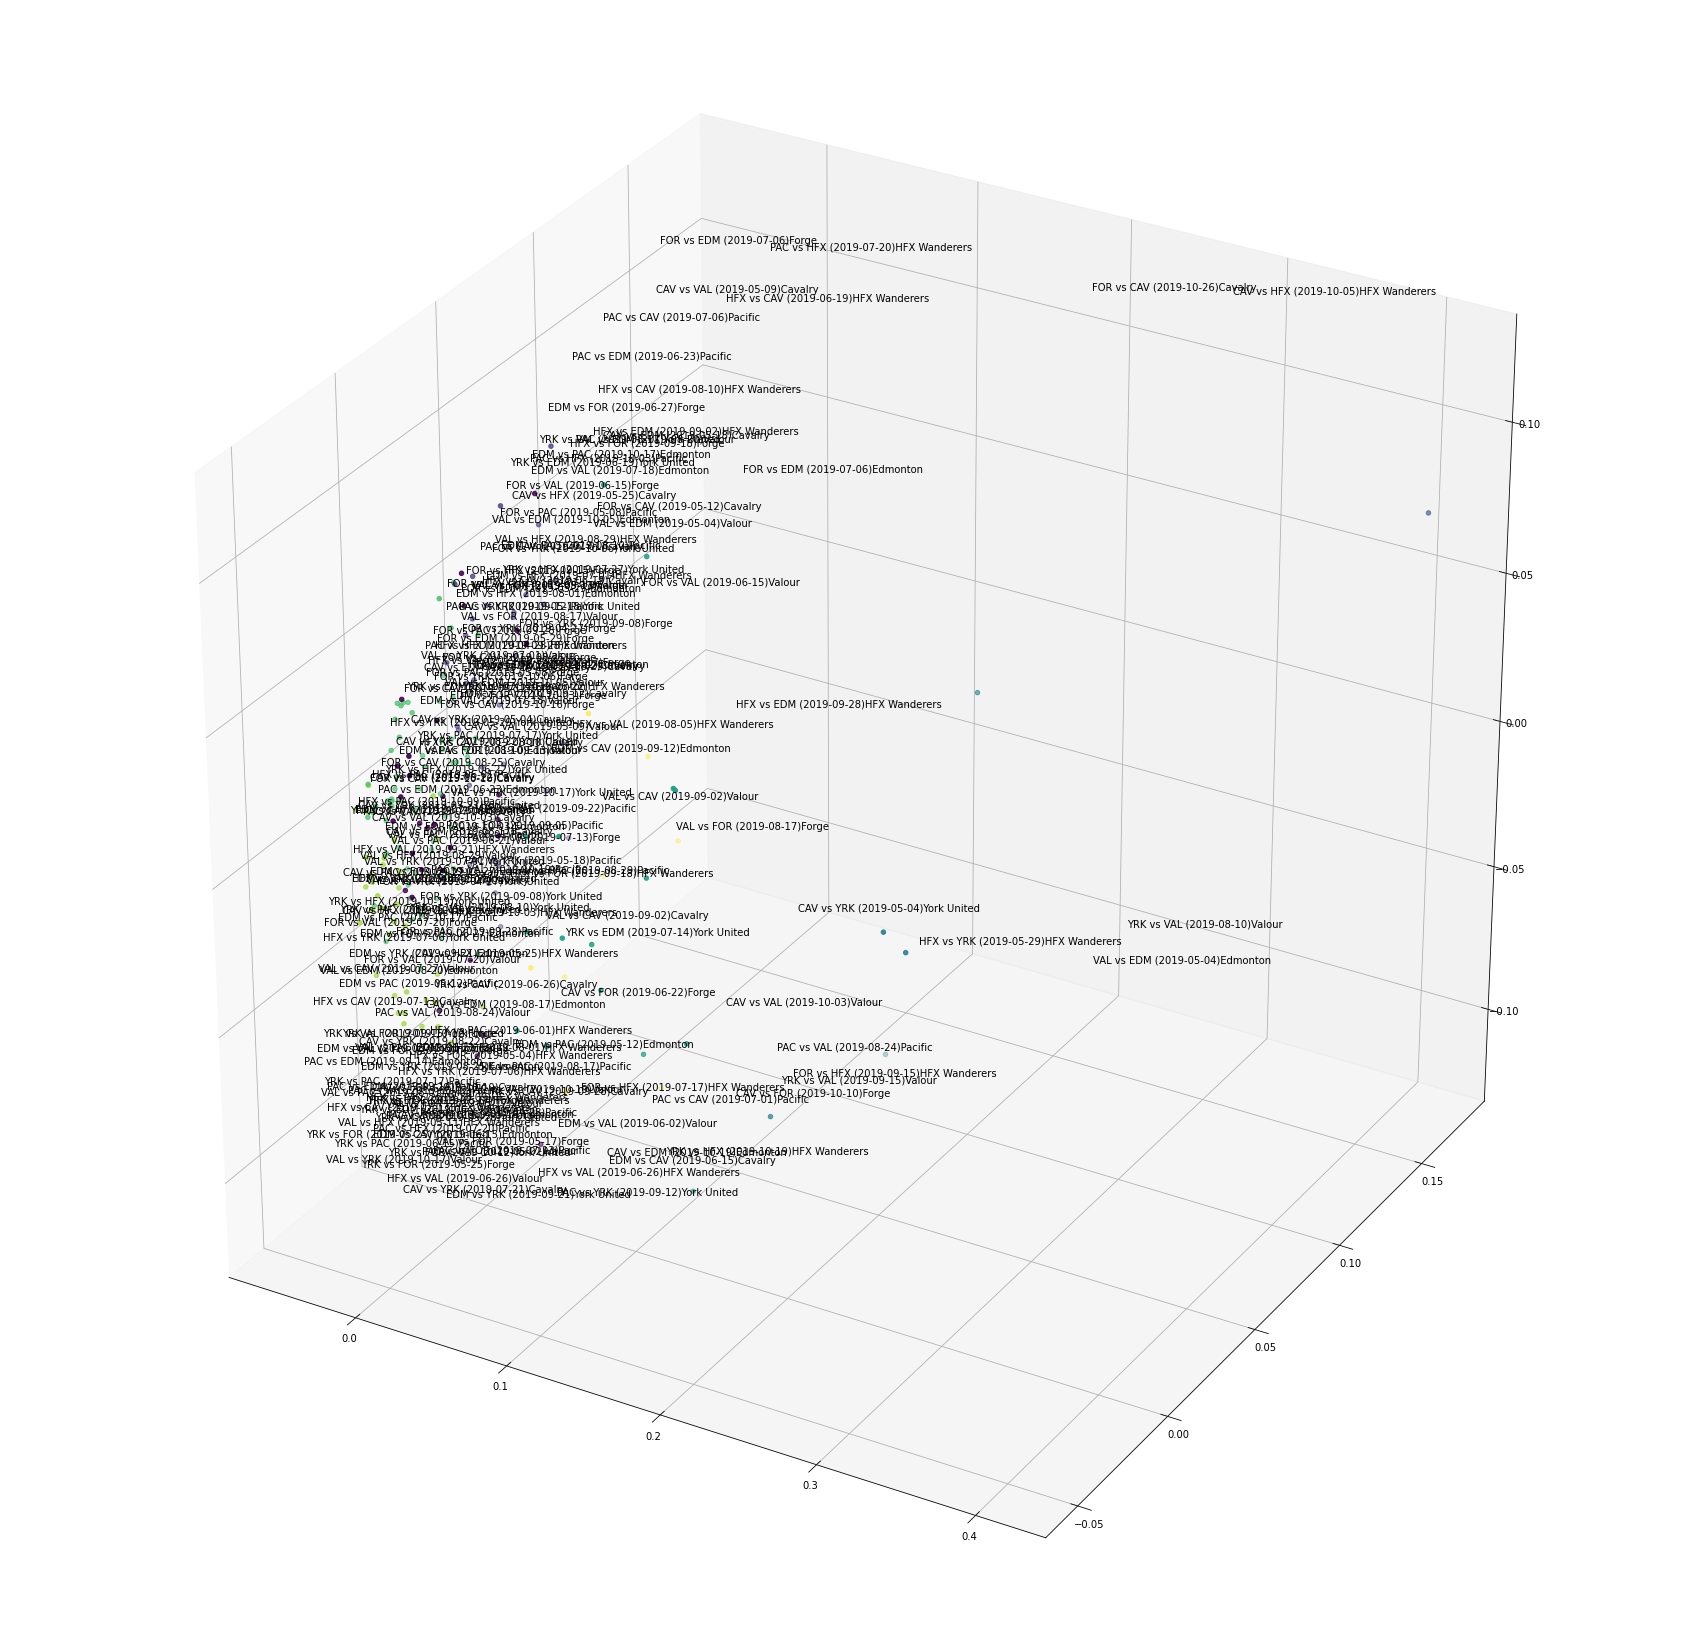

In [ ]:
from mpl_toolkits import mplot3d
plt.figure(figsize=(30,30))
ax = plt.axes(projection ="3d")
ax.scatter3D(pca[:,0],pca[:,1],pca[:,2]*2,c=labels)
for i in range(len(pca)):
  ax.text(pca[i][0]*1.5,pca[i][1]*1.5,pca[i][1]*1.5,np.array(data_trim["scatterExtra"])[i]+np.array(data["team"])[i])